In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
ask_amt_df = pd.read_csv("Resources/charity_data.csv")
ask_amt_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
ask_amt_df = ask_amt_df.drop(columns=["EIN","NAME"])
ask_amt_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
ask_amt_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at ASK_AMT value counts for binning
ask_amt_types = ask_amt_df.ASK_AMT.value_counts()
ask_amt_types

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

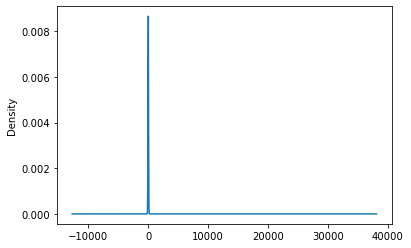

In [6]:
ask_amt_types.plot.density()

In [11]:
# Determine which values to replace if counts are less than 2000
replace_ask_amt = list(ask_amt_types[ask_amt_types < 2000].index)

# Replace in dataframe
for app in replace_ask_amt:
    if app < 100000:
        ask_amt_df.ASK_AMT = ask_amt_df.ASK_AMT.replace(app,"Between 5000 and 100000")
    elif app < 500000:
        ask_amt_df.ASK_AMT = ask_amt_df.ASK_AMT.replace(app,"Between 100000 and 500000")
    elif app < 1000000:
        ask_amt_df.ASK_AMT = ask_amt_df.ASK_AMT.replace(app,"Between 500000 and 1 million")
    elif app < 5000000:
        ask_amt_df.ASK_AMT = ask_amt_df.ASK_AMT.replace(app,"Between 1 and 5 million")
    else:
        ask_amt_df.ASK_AMT = ask_amt_df.ASK_AMT.replace(app,"Over 5 million")
        
    
# Check to make sure binning was successful
ask_amt_df.ASK_AMT.value_counts()


5000                            25398
Between 5000 and 100000          4368
Between 100000 and 500000        2305
Between 1 and 5 million           940
Between 500000 and 1 million      651
Over 5 million                    637
Name: ASK_AMT, dtype: int64